In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from datetime import datetime, date 
plt.style.use('ggplot')

In [ ]:
trans = pd.read_excel('/content/Raw_data.xlsx')

In [ ]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

Here, we can see the datatype of product_first_sold_date is not in datetime format. The data type of this column must be changed from int64 to datetime from fomrat. 

Total Records 

In [ ]:
print("Total records (rows) in the dataset : {}".format(trans.shape[0]))
print("Total columns (features) in the dataset : {}".format(trans.shape[1]))


Total records (rows) in the dataset : 20000
Total columns (features) in the dataset : 13


Numeric Columns and Non Numeric Columns 

In [ ]:
df_numeric = trans.select_dtypes(include = [np.number])
numeric_cols = df_numeric.columns.values
print('The numeric columns are:')
print(numeric_cols)


df_non_numeric = trans.select_dtypes(exclude = [np.number])
numeric_cols = df_non_numeric.columns.values
print('The numeric columns are:')
print(numeric_cols)

The numeric columns are:
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
The numeric columns are:
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


Missing Values 

In [ ]:
#total number of missing values 

trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
#percentage of missing value

trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

Here, we can see that columns such as online_order, brand, product_line, product_class, product_size, standard_cost, list_price have missing values. 

Online Order 
Since 1.8% of the records have online_order data missing we can perform mode imputation for this categootical column 

In [ ]:
trans[trans['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [ ]:
most_freq_online_mode = trans['online_order'].mode()
most_freq_online_mode

0    1.0
dtype: float64

In [ ]:
trans['online_order'].fillna(1, inplace = True)

In [ ]:
trans['online_order'].isnull().sum()

0

It is observed that when brand is null then all other columns values with missing values 'product_line',product_class, product_size, standard_cost, 
product_first_sold_date are also null. 

In [ ]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_line','standard_cost','product_first_sold_date','transaction_date','transaction_date']].drop_duplicates()

,brand,product_line,product_line,standard_cost,product_first_sold_date,transaction_date,transaction_date
136,NaN,NaN,NaN,NaN,NaN,2017-09-23,2017-09-23
159,NaN,NaN,NaN,NaN,NaN,2017-08-27,2017-08-27
366,NaN,NaN,NaN,NaN,NaN,2017-03-10,2017-03-10
406,NaN,NaN,NaN,NaN,NaN,2017-06-14,2017-06-14
676,NaN,NaN,NaN,NaN,NaN,2017-07-02,2017-07-02
...,...,...,...,...,...,...,...
19196,NaN,NaN,NaN,NaN,NaN,2017-12-06,2017-12-06
19340,NaN,NaN,NaN,NaN,NaN,2017-12-26,2017-12-26
19383,NaN,NaN,NaN,NaN,NaN,2017-06-11,2017-06-11
19793,NaN,NaN,NaN,NaN,NaN,2017-01-13,2017-01-13


In [ ]:
trans[trans['brand'].isnull()][['brand','product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date', 'transaction_date','online_order']].shape[0]


197

In [ ]:
records_to_drop = trans[trans['brand'].isnull()][['brand','product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date','transaction_date','online_order']].index

records_to_drop


Int64Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,
             1282,
            ...
            19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859,
            19871],
           dtype='int64', length=197)

In [ ]:
trans.drop(index= records_to_drop, axis = 0, inplace = True)

In [ ]:
trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

Creating a new fature "Profit"

In [ ]:
trans['Profit'] = trans['list_price'] - trans['standard_cost']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


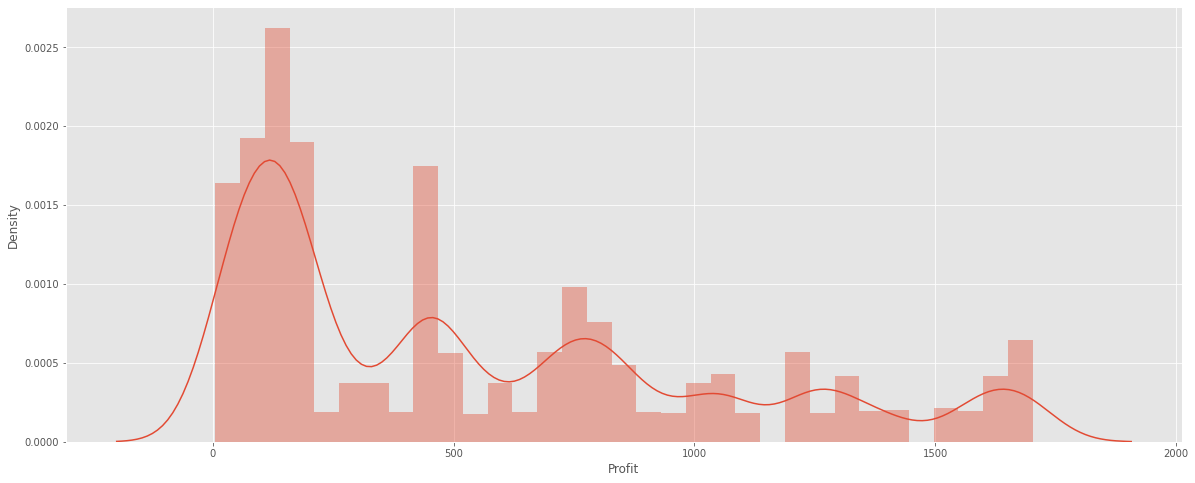

In [ ]:
#Distributing the profit column 

plt.figure(figsize =(20,8))
sns.distplot(trans['Profit'])

We'll be checking if there is any incosistent data present in the columns. 
The columns to be cheacked are 'online_order', 'order_status', 'product_line', ''product_class', and 'Brand'.


Online Order 

In [ ]:
trans['online_order'].value_counts()

1.0    10097
0.0     9706
Name: online_order, dtype: int64

Order Status 

In [ ]:
trans['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [ ]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


Product Line 

In [ ]:
trans['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [ ]:
trans['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [ ]:
trans['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

Duplication Checks 


In [ ]:
trans_dedupped = trans.drop('transaction_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(trans_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(trans.shape[0]))


Number of records after removing customer_id (pk), duplicates : 19803
Number of records in original dataset : 19803


In [ ]:
from google.colab import files 
trans.to_csv('Transactions_cleaned.csv', index = False)
files.download('Transactions_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>